In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [4]:
#Basic Checks
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [7]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [8]:
#Statistical analysis 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [9]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [11]:
data.describe(include = 'O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


Observation: In numerical and categorical no constant feature is present 

# DEPARTMENT WISE PERFORMANCE RATING

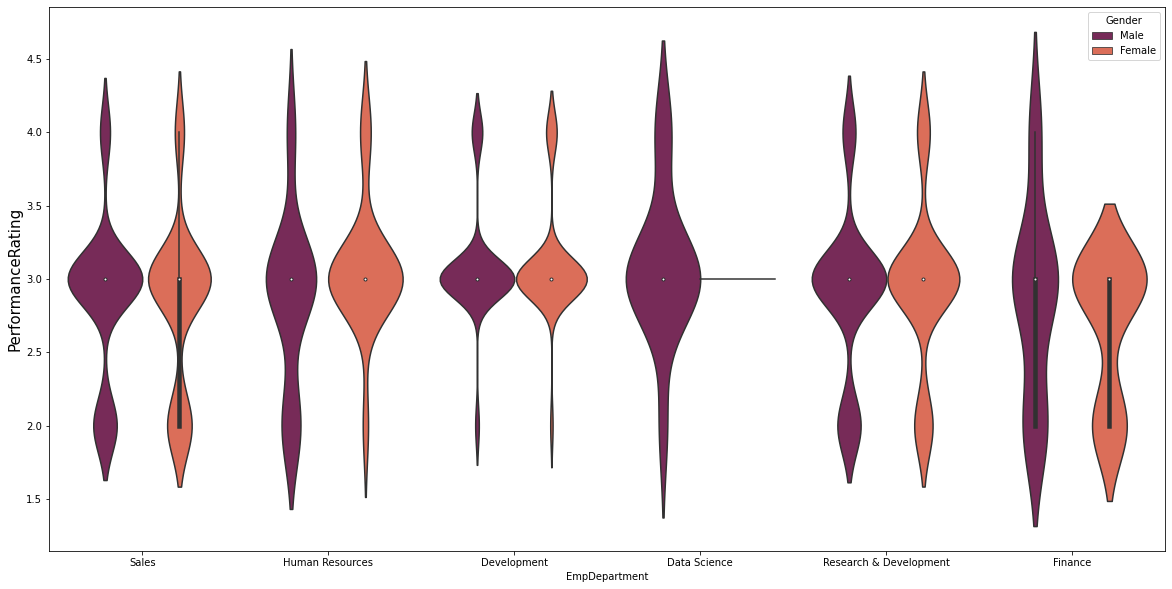

In [19]:
plt.figure(figsize=(20,10), facecolor='white')
sns.violinplot(x = 'EmpDepartment', y = 'PerformanceRating', data = data,hue=data.Gender,palette='rocket')
plt.xlabel('EmpDepartment',fontsize = 10)
plt.ylabel('PerformanceRating',fontsize = 15)
plt.show()

In [20]:
#calculating the percentage distribution of employees by performance rating and department helps in gaining a deeper 
#understanding of organizational performance


percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


In [21]:
#2.Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


Observations:
    Employee last salary hike percent:

More Number of Employees whose salary hike percentage belongs to 11-19 % are getting 2 & 3 performance rating Maximum time.
Employees whose salary hike percentage is in between 20-22%, There performance rating is 4

In [22]:
# 3.Employee Work life balance
pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpWorkLifeBalance,,,,
1,16,48,0,64
2,51,216,27,294
3,115,533,79,727
4,12,77,26,115
All,194,874,132,1200


Observations:
    In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees

# CHECKING THE DISTRIBUTION OF CONTINUOUS FEATURE

In [23]:
data.select_dtypes('int64').head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


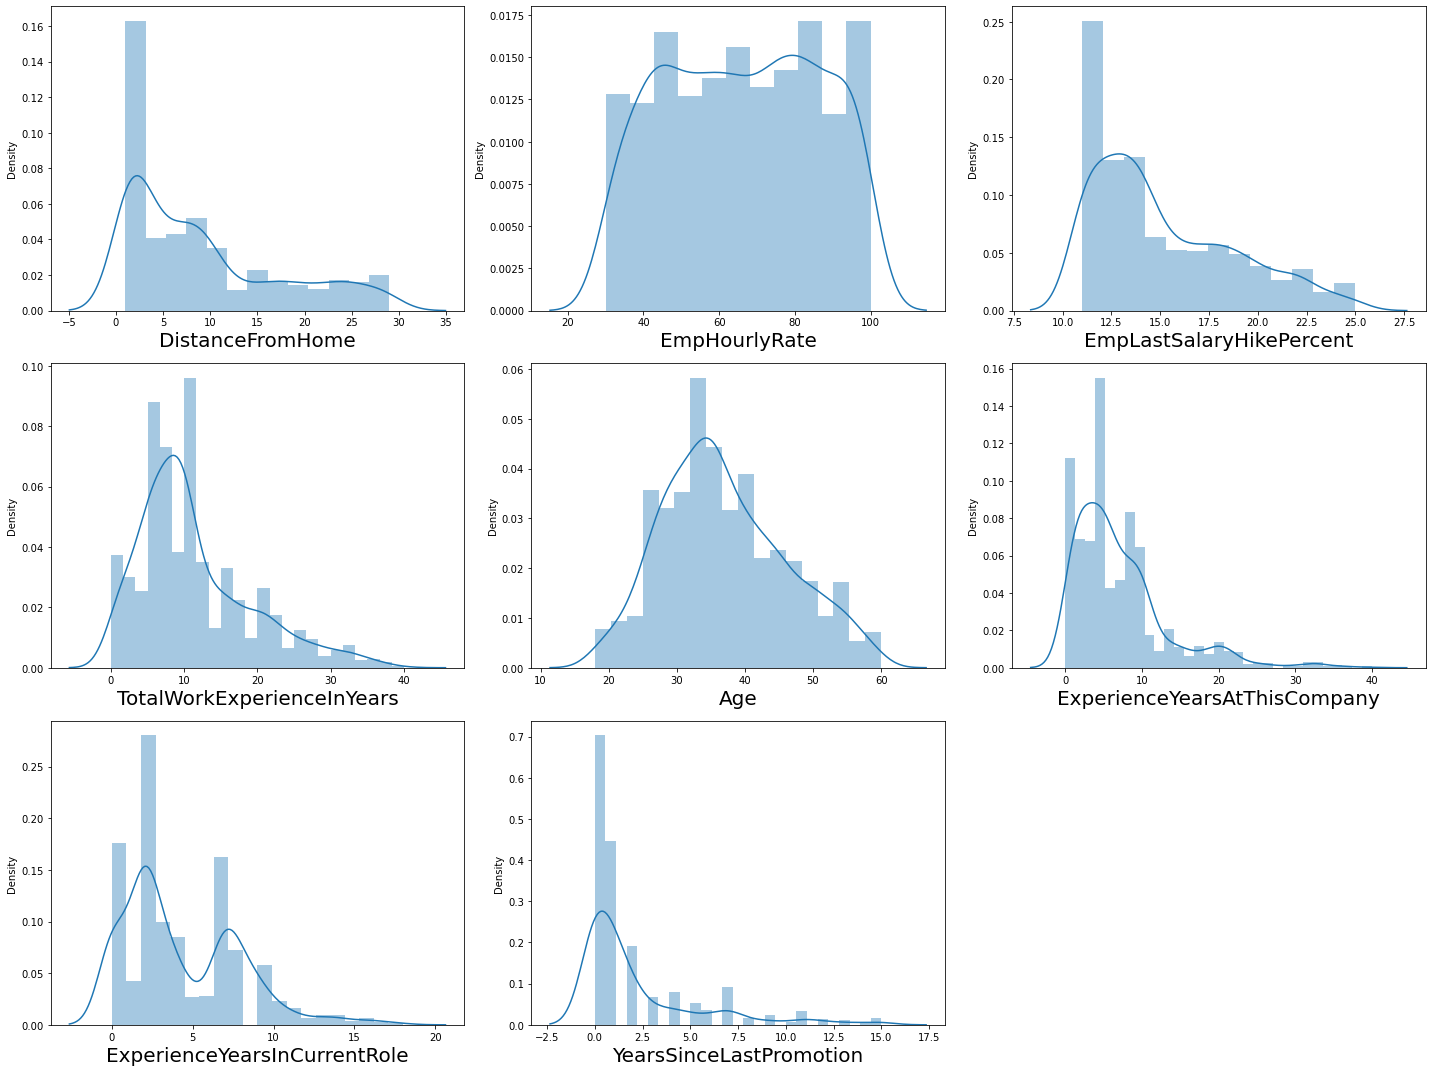

In [25]:
continuous = data[['DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','Age',
                   'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,15)) # defining canvas size
plotno = 1 # counter

for column in continuous: # iteration of columns / acessing the columns from count 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=continuous[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() 

# Check Skewness

In [26]:
print('1.Distance From Home Feature Skewness:',data.DistanceFromHome.skew())
print('2.Employee Hourly Rate Feature Skewness:',data.EmpHourlyRate.skew())
print('3.Employee Last Salary Hike Percent Feature Skewness:',data.EmpLastSalaryHikePercent.skew())
print('4.Total Work Experiance In Year Feature Skewness:',data.TotalWorkExperienceInYears.skew())
print('5.Experiance Year At This Company Feature Skewness:',data.ExperienceYearsAtThisCompany.skew())
print('6.Experiance Year In Current Role Feature Skewness:',data.ExperienceYearsInCurrentRole.skew())
print('7.Year Since Last Promotion Feature Skewness:',data.YearsSinceLastPromotion.skew())
print('8.Years With Current Manager Feature Skewness:',data.YearsWithCurrManager.skew())
print('9.Age Feature Skewness:',data.Age.skew())

1.Distance From Home Feature Skewness: 0.9629561160828001
2.Employee Hourly Rate Feature Skewness: -0.035164888157941436
3.Employee Last Salary Hike Percent Feature Skewness: 0.8086536332261228
4.Total Work Experiance In Year Feature Skewness: 1.0868618597364565
5.Experiance Year At This Company Feature Skewness: 1.789054979919473
6.Experiance Year In Current Role Feature Skewness: 0.8881586703270758
7.Year Since Last Promotion Feature Skewness: 1.9749315589155791
8.Years With Current Manager Feature Skewness: 0.8131582957766446
9.Age Feature Skewness: 0.38414495910435587


From above all Feature skewness only one feature Year Since Last Promotion have skew so we need to do feature transformation in data preprocessing

# CHECK THE KURTOSIS

In [28]:
#Kurtosis: kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.

print('1.Distance From Home Feature kurtosis:',data.DistanceFromHome.kurtosis())
print('2.Employee Hourly Rate Feature kurtosis:',data.EmpHourlyRate.kurtosis())
print('3.Employee Last Salary Hike Percent Feature kurtosis:',data.EmpLastSalaryHikePercent.kurtosis())
print('4.Total Work Experiance In Year Feature kurtosis:',data.TotalWorkExperienceInYears.kurtosis())
print('5.Experiance Year At This Company Feature kurtosis:',data.ExperienceYearsAtThisCompany.kurtosis())
print('6.Experiance Year In Current Role Feature kurtosis:',data.ExperienceYearsInCurrentRole.kurtosis())
print('7.Year Since Last Promotion Feature kurtosis:',data.YearsSinceLastPromotion.kurtosis())
print('8.Years With Current Manager Feature kurtosis:',data.YearsWithCurrManager.kurtosis())
print('9.Age Feature Kurtosis:',data.Age.kurtosis())

1.Distance From Home Feature kurtosis: -0.24201677636189256
2.Employee Hourly Rate Feature kurtosis: -1.1868905128360532
3.Employee Last Salary Hike Percent Feature kurtosis: -0.29974077544117517
4.Total Work Experiance In Year Feature kurtosis: 0.8056333333819827
5.Experiance Year At This Company Feature kurtosis: 4.057959404441291
6.Experiance Year In Current Role Feature kurtosis: 0.4380286874251209
7.Year Since Last Promotion Feature kurtosis: 3.5390800793468817
8.Years With Current Manager Feature kurtosis: 0.14820164456972984
9.Age Feature Kurtosis: -0.4309995807632232


From above all Feature kurtosis only high in two features experiance year at this company & Year Since Last Promotion have kutosis so we need to do feature transformation in data preprocessing

# DISTRIBUTION OF MEAN OF DATA

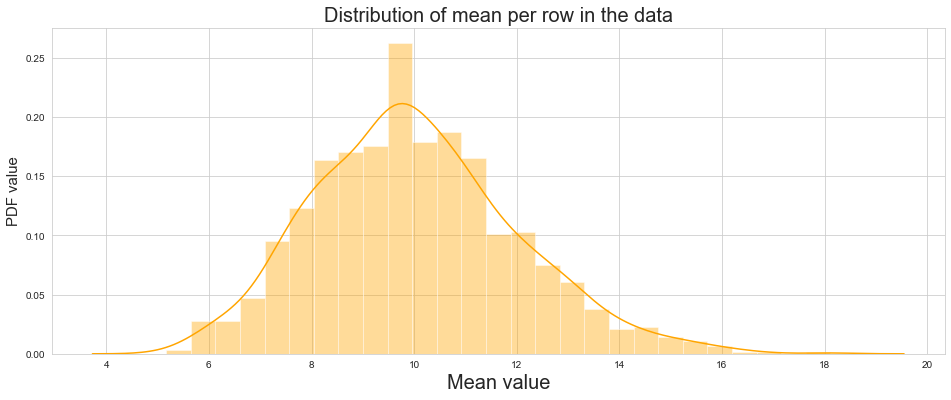

In [29]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = data.columns.values[0:27]
plt.title('Distribution of mean per row in the data',fontsize=20)
plt.xlabel('Mean value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(data[features].mean(axis=1),color='ORANGE', kde=True)
plt.show()

Observation:

From the above graph close to guassian distribution with mean value 9.5
From above graph we can say that around 80% feature mean lies between 8.5 to 10.5

# DISTRIBUTION OF STANDARD DEVIATION OF DATA

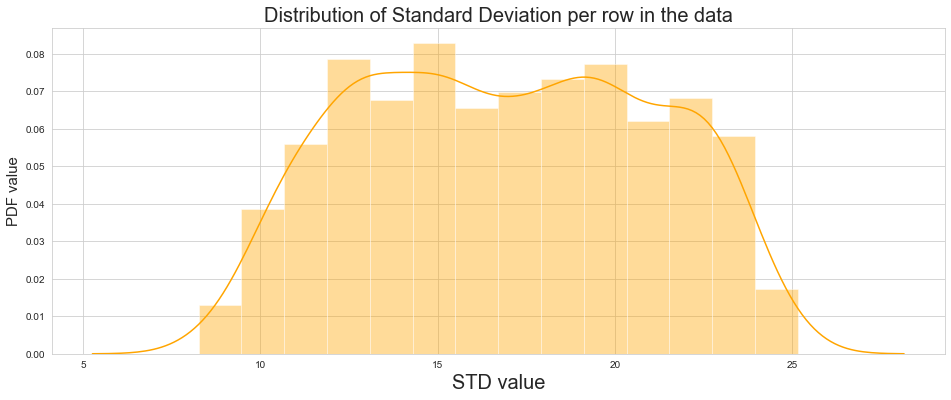

In [31]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = data.columns.values[0:27]
plt.title('Distribution of Standard Deviation per row in the data',fontsize=20)
plt.xlabel('STD value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(data[features].std(axis=1),color='ORANGE', kde=True)
plt.show()

Observation: This graph also look like guassian distribution around 30% of feature standard deviation around the range of 15 to 20 and remaining 70% feature standard deviation in between 0 to 2

